# __INFO 2950: Phase IV__
#### __Group Members:__ Anusha Bishayee, Katheryn Ding

---
### __Introduction:__  

#### How do ESG score and stock performance (price) align across different industries? What associations can we find between company industry, stock performance, and ESG ratings?

#### note: ESG score refers to a quantiative metric measuring a company's environmental, social, and governance performance; 'environmental' pertains to aspects like waste management and energy emissions, 'social' pertains to aspects like customer satisfaction and DEI in the workplace, and 'governance' pertains to aspects like operating efficiencies and risk management. ESG scores are typically examined by independent investors, business analysts, and even competitior companies to assess risk or opportunities associated with a specific company's practices.


Stocks represent ownership in a company, akin to buying a slice of a large overall pie, and stock price is a critical indicator of the financial health and market valuation of a company (how well a company is doing and how much it is worth). Analysts and investors typically examine stock trends to gauge whether a company is a good choice to invest in (or buy a share of) at a current point in time. Stock performance can typically be influenced by numerous factors, such as market conditions, industry trends, social factors, and the operational and strategic choices of a company itself.

In the current day, ESG factors have emerged as important determinants of how sustainable and resilient a company is. Growing importance of ESG metrics in investment decisions stems from their potential to provide a more comprehensive view of the long-term viability of a company. Unlike traditional financial measures, ESG factors can evaluate a broader impact of a company’s operations and strategic choices (bird's eye view of operations), which can help to illuminate risks and opportunities that may not be immediately apparent through financial statements and histories alone. This broader evaluation can help investors identify companies that are well-positioned for sustainable growth, particularly in our rapidly changing world, where we currently struggle with climate change, social inequality, and technological disruption. Hence, in recent years, ESG-focused funds are reportedly attracting billions of dollars in investments annually (Friede, Busch, & Bassen, 2015*), and companies with higher ESG ratings can be perceived as lower-risk and more adaptable to face long-term challenges. The aforementioned study consists of a meta-analysis, where the authors reviewed over 2,000 other empirical studies and concluded the majority found a positive relationship between ESG and financial performance, highlighting the importance of ESG metrics in contributing to social and environmental well-being as well as informed investment stratetgies. ESG-conscious investors would also argue that companies excelling in environmental stewardship, social responsibility, and governance are better equipped to navigate long-term challenges such as climate change, labor issues, and regulatory pressures, hence the lower-risk and more adaptable classification (Ernst & Young LLP, 2023**). On the other hand, companies who have poorer ESG metrics and practices now may face imminent regulatory risks, damage to reputation with declining consumer trust, and legal penalties. 

By examining how ESG scores are associated with stock performance across different industries, this project aims to determine whether higher ESG scores truly align with better market performance, or if influence varies by industry. This will assist in the overall quest to make informed decisions on which companies to keep an eye on (and possibly invest in) as ESG influence on worldwide investment decisions heightens.

The primary ESG data source we used in this case study is published on Kaggle by a user named Alistair King. The kaggle dataset is in .csv format, containing ESG data collected by pulling from ESG Data: ESG Enterprise (https://www.esgenterprise.com/), which is a publicly available API, pulling the Ratings data from https://app.esgenterprise.com/uploads/ESG-Enterprise-Risk-Ratings-MethodologyV3.pdf, and finally, pulling the Financial & Company Data from Finnhub (https://finnhub.io/). Besides from ESG dataset, we imported the yfinance library for stock information, and we joined the ESG data to the yfinance stock data, matching on company ticker. Detailed data cleaning steps are described in the Data Description and Cleaning section.

Based on our conclusions in this project, we found statistically significant positive relationships between ESG ratings and the rate of return of stocks at the industry level, corroborating the importance of ESG as a significant indicator of financial performance. With further research and studies, we can leverage more of the existing data to create actionable insights for investors, policymakers, and various corporate leaders, which can help reinforce the role of sustainability in fostering both economic success and responsible company growth.


*Ernst & Young LLP (2023). Why ESG performance is growing in importance for investors. EY Insights.***

*Friede, G., Busch, T., & Bassen, A. (2015). ESG and financial performance: Aggregated evidence from more than 2000 empirical studies. Journal of Sustainable Finance & Investment.**

*See Acknowledgements and Bibliography for a full citation list.*

---
## __Data Description and Cleaning__

In [2]:
import contextlib
import os
import sys
import warnings

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

from scipy import stats
from scipy.stats import norm

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

---
### __Data Cleaning and Trustworthiness Discussion__

The data cleaning work that produces our main dataset used in our analyses is found here: https://github.com/anushabishayee/info2950_finalproject/blob/main/data_cleaning.ipynb.

A brief overview of the methods found in the .ipynb follows: we imported the yfinance library, downloaded the Kaggle csv with the company ESG data, cleaned the dataset for NaNs and unneeded values, and reformatted some date values for ease of manipulation. Then, we joined the ESG data to the yfinance stock data, matching on company ticker (we created 4 new stock metric columns), and dropped NaNs for the creation of merged_df.

Regarding trustworthiness: This dataset was aggregated and published on Kaggle by a user named Alistair King, who has also published 79 other datasets on the website. They seem to have collected the ESG data by pulling from ESG Data: ESG Enterprise (https://www.esgenterprise.com/), which is a publicly available API, pulling the Ratings data from https://app.esgenterprise.com/uploads/ESG-Enterprise-Risk-Ratings-MethodologyV3.pdf, and finally, pulling the Financial & Company Data from Finnhub (https://finnhub.io/). They state that they “used company stock ticker as a unique identifier, then pulled and collated data from various APIs.” As data was pulled from a number of cited sources, we believe that we can trust this dataset relatively more than some of the other un-cited, un-verified datasets that exist on Kaggle. We also trust this author more after investigating their frequency activity on both Kaggle and Github (they are relatively active on both), as well as seeing the provided citation links for their methodology of creating the dataset. The data was updated within the current year, about 7 months ago. However, this dataset is not particularly tied to any peer-reviewed academic paper or official government publication, which potentially leaves room for concerns about data accuracy. On the other hand, there are no immediate red flags when looking through the dataset and the methodology of creating it. Data most likely was verified for quality when pulling from the above websites to conglomerate the dataset.

In [3]:
merged_df = pd.read_csv("merged_df.csv")

---
### __Data Description__
1) Where can your raw source data be found, if applicable?

- We have 1 main dataset: merged_df, which can also be found on our GitHub: https://github.com/anushabishayee/info2950_finalproject/blob/main/merged_df.csv/.
- The raw data that used to make this dataset can be be found on Kaggle, posted by a user named Alistar King (https://www.kaggle.com/alistairking), and the link to that page is here: https://www.kaggle.com/datasets/alistairking/public-company-esg-ratings-dataset/data. 
- We also have the data from the Kaggle page in csv format on our GitHub: https://github.com/anushabishayee/info2950_finalproject/blob/main/esg_data.csv. 
- We joined this csv, after cleaning, with data from the Yahoo Finance API, found in the yfinance Python library created by Ran Aroussi (https://aroussi.com/). 
- A description of the library can be found here: https://pypi.org/project/yfinance/. 

- Even more specifically, the Kaggle author states that they pulled the data for their csv from multiple APIs, like ESG Enterprise, a publicly-available API. They grabbed financial and company data from Finnhub. All 3 of these links can be found here: https://github.com/anushabishayee/info2950_finalproject/blob/main/raw%20data/esg%20kaggle%20source%20data%20links as well as on the aforementioned Kaggle page and under question 3) in this section.
***

2) If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

- Individuals are not involved in the data directly, as each observation corresponds to an entire company.

***

3) What preprocessing was done, and how did the data come to be in the form that you are using?

- Our preprocessing of these datasets is detailed in the .ipynb link in the markdown cell above. Generally again, we imported the yfinance library, downloaded the Kaggle csv with the company ESG data, cleaned the dataset for NaNs and unneeded values, and reformatted some date values for ease of manipulation. Then, we joined the ESG data to the yfinance stock data, matching on company ticker (we created 4 new stock metric columns), and dropped NaNs for the creation of merged_df. 
- For the Kaggle csv, the author notes that they used company stock ticker as a unique identifier, then pulled and collated data from various APIs. in specific, they utilized ESG Enterprise (https://www.esgenterprise.com/), a publicly-available API, and pulled their ratings methodology from https://app.esgenterprise.com/uploads/ESG-Enterprise-Risk-Ratings-MethodologyV3.pdf. They grabbed financial and company data from Finnhub (https://finnhub.io/).

***

4) What processes might have influenced what data was observed and recorded and what was not?

- For the ESG data, the Kaggle author of the csv specifically mentioned that only mid/large-cap companies are included, so this influences the specific companies that are recorded in the initial data - smaller companies (that also might have an ESG score) will not be 'observed' here. The author pulled data from ESG Enterprise and Finnhub, so any companies that do not have data available there will not be observed in the dataset. We also dropped any company that had a NaN or blank column value for the ESG columns, and dropped any company that didn't have stock data available in Yahoo Finance (or had NaNs for any specific finance column).

***

5) Who funded the creation of the dataset?

- We created these analysis-ready datasets from two data sources: a 'Public Company ESG Ratings Dataset' Kaggle dataset from user Alistair King (https://www.kaggle.com/alistairking), a New York-based Kaggle Datasets Grandmaster, as well as the yfinance Python library, created by Ran Aroussi (https://aroussi.com/) as a way around the 2017 Yahoo Finance API deprecation. It is unclear if these datasets were 'funded', but their organization and accumulation were spearheaded by the two aforementioned people, respectively.

***

6) Why was this dataset created?
- We formulated our main analysis-ready dataset (merged_df) to examine associations between some of the largest USD-utilizing companies' ESG scores and their stock performances (as well as industry-specific analyses). Please note that stock performance data typically has a range between 2/1/21 - 12/31/22 as most companies in the dataset have a 'last processing date' of February 2022 - November 2022 for their ESG score.
- The original ESG csv was created and uploaded by Kaggle user Alistair King, perhaps for personal enrichment or curiosity (they do have a Kaggle Datasets Grandmaster rank, so perhaps they just enjoy creating and uploading datasets). The original yfinance Python library was created by Ran Aroussi to have a simple way to download historical market data from Yahoo Finance, due to the Yahoo Finance API deprecation.

***

7) What are the observations (rows) and attributes (columns)?

For the merged_df dataset, each row corresponds to 1 of 620 unique, mid- to large-cap company that is publicly-traded and utilizes USD. Columns in this dataset include:
+ ticker - a unique combination of letters and numbers that represent a particular company's stock
+ name - the official name of the company, as it appears on the public trading market
+ currency - the currency the company is traded in (this was filtered to only be USD)
+ industry - the type of output the company produces (represented as a categorical variable with many options)

+ environment_grade - a letter score given to a company that measures how well it complies to environmental standards, ranging from AAA being the best to CCC being the worst
+ environment_level - a categorical classification of a company's overall environmental performance (low, medium, high)

+ social_grade - a letter score given to a company that measures how well it complies to social standards, ranging from AAA being the best to CCC being the worst
+ social_level - a categorical classification of a company's overall social performance (low, medium, high)

+ governance_grade - a letter score given to a company that measures how well it complies to governance standards, ranging from AAA being the best to CCC being the worst
+ governance_level - a categorical classification of a company's overall governance performance (low, medium, high)

+ total_grade - a letter score given to a company that measures how well it complies to environmental, social, and governance-related standards, ranging from AAA being the best to CCC being the worst
+ total_level - a categorical classification of a company's overall environmental, social, and governance performance (low, medium, high)

+ environment_score - a numerical measure of how well a company performs on environment-related factors, ranging from 0-1000
+ social_score - a numerical measure of how well a company performs on social-related factors, ranging from 0-1000
+ governance_score - a numerical measure of how well a company performs on governance-related factors, ranging from 0-1000
+ total_score - a numerical measure of how well a company performs on environment, social, and governance-related factors, ranging from 0-1500]

+ last_processing_date - the last processing date of the ESG score metrics for the company

the following columns are ones that we created, using the yfinance data:
+ start_close - the closing price of the company stock on 2/1/21
+ end_close - the closing price of the company stock on 12/31/22

+ percentage_change - the percent change in the company stock price from close time on 2/1/21 to close time on 12/31/22 (100 * (end price - start price) / start price))
+ volatility - standard deviation of daily returns of the company stock, aka the percentage change in the stock price from day to day (indicator of how much stock price fluctuates in a given period, higher volatility is riskier, lower volatility has more stability). specifically, daily return is calculated by closing price on day x+1 - closing price on day x divided by closing price on day x, so all daily returns in the time period 2/1/21 - 12/31/22 are calculated for the specific company stock, and then the standard deviation is taken to get the volatility
+ 50_day_SMA - 50 day simple moving average, or the sum of closing price of a company stock for the last 50 days before 12/31/22, divided by 50 (if current stock price is above the 50-day SMA, the company is in uptrend, and vice versa)
+ cumulative_return - cumulative return of the company stock over the entire period ((close price on 12/31/22 / close price on 2/1/21) - 1), positive values represent returns, and negative values represent losses

## __Preregistration Statements__

### __Preregistration Statement 1__
#### Hypothesis 1: 
Industries with higher total ESG scores will have generally better stock performances.

#### Analysis 1: 
According to La Torre, Mango, Cafaro, and Leo (2020)*, “panel data analysis demonstrates that the ‘ESG Overall index’ has, in general, a statistically significant and positive impact on returns (on a company level).” Building on this study, we will investigate this relationship at the industry level - using our `merged_df` dataset, we will explore if there is statistical evidence showing an association of ESG with stock return on an industry level. Our hypothesis is that industries with higher average total ESG scores (Average Total ESG Score) will have stronger financial performance, as measured by two key indicators: (1) the stock rate of change (percentage_change) over the period 4/1/21 to 4/1/22 and (2) the 50-Day Simple Moving Average (50_day_SMA) of stock prices prior to 4/1/22.

To test this hypothesis, we will calculate the average total ESG score (`Average Total ESG Score`) for each industry in the dataset and use it as the independent variable in 2 different linear regression OLS models. The dependent variables for the 2 models will be 2 different measures of financial performance respectively: the stock rate of change over the time period 2/1/21 - 12/31/22 (`percentage_change`), and the stock 50-Day Simple Moving Average of the last 50 days before 12/31/22 (`50_day_SMA`). We will then look to the slope coefficient of the independent variable (`Average Total ESG Score`) in each of the two linear regression models, referred to here as βESG.

The null hypothesis for the 2 tests will then be that there is no positive relationship between average total ESG scores and stock performance measures at the industry level (**H₀: βESG ≤ 0**), and the alternative hypothesis will be that there is a positive relationship between the two (**Hₐ: βESG > 0**). 

To reiterate, we will run 2 separate regression analyses at the significance level of α = 0.05: one for `percentage_change` and one for `50_day_SMA`. If the test results return statistically significant positive coefficients (with p-values less than 0.05), we can conclude there is statistically significant evidence that suggests that higher average total ESG scores are associated with better stock performance at the industry level. If not, we will fail to reject the null hypothesis, and cannot conclude that there is a positive association between the variables.

### __Preregistration Statement 2__
#### Hypothesis 2
Companies with "High" ESG levels (defined as `total_grade` = 'BBB' or 'A') will exhibit a stronger correlation between their stock's rate of change (`percentage_change`) and the total ESG score (`total_score`) compared to companies with "Not High" ESG levels (defined as `total_grade` = 'BB' or 'B').

#### Analysis 2
According to Friede, G., Busch, T., & Bassen, A. (2015)**, “more than 2100 [out of 3700 studies], in particular, company-focused-empirical studies, suggest a positive ESG relation”. To build on this study and evaluate whether ESG score levels are more strongly correlated with stock return rates in companies with higher ESG scores, we will compare the correlation coefficients between stock rate of change (`percentage_change`) and total ESG score (`total_score`) for two groups: companies with "High" ESG levels (`total_grade` = 'BBB' or 'A') and companies with "Not High" ESG levels (`total_grade` = 'BB' or 'B').

We will first calculate the Pearson correlation coefficients for each group, measuring the strength of the linear relationship between `percentage_change` and `total_score`, and giving us a quantified measure of the linear association between the 2 variables. To test the difference between the two correlation coefficients, we will apply the Fisher Z-transformation, which converts correlation coefficients into z-score. The null hypothesis for this test will state that the correlation coefficient for industries with "High" ESG levels is equal to the correlation coefficient for companies with "Not High" ESG levels (**H₀: ρHigh = ρNotHigh**). The alternative hypothesis is that the correlation coefficient for companies with "High" ESG levels and industries with 'Not High' ESG levels are different (**Hₐ: ρHigh ≠ ρNotHigh**).

We will determine whether the difference between the correlation coefficients for the two groups is statistically significant at a 95% confidence level (α = 0.05). If the test reveals a significant difference (with a p-value less than 0.05), we will conclude that there is statistically significant evidence that suggests companies with "High" ESG levels exhibit a different correlation between stock rate of change and total ESG score compared to companies with "Not High" ESG levels. If the difference is not statistically significant, we will fail to reject the null hypothesis, and cannot conclude that there is a statistically significant difference between the correlation coefficients.

### __Preregistration Statement 3__
#### Hypothesis 3:
Companies with "High" ESG levels (defined as `total_grade` = 'BBB' or 'A') exhibit a higher average rate of change in stock price compared to Companies with "Not High" ESG levels (defined as 'total_grade' = 'BB' or 'B'). 

#### Analysis 3:
Also drawing from the meta-analysis from Friede, G., Busch, T., & Bassen, A. (2015)**, where the authors identified a positive relationship between ESG performance and company performance in over 2100 studies, we also aim to test whether companies with higher ESG levels demonstrate significantly higher rates of change in stock price. In particular, we hypothesize that companies classified as "High" ESG will demonstrate a significantly greater average stock rate of change (`percentage_change`) than those classified as "Not High" ESG.

To test this hypothesis, we will again divide the dataset into two groups: companies with "High" ESG levels ('total_grade' = 'BBB' or 'A') and companies with "Not High" ESG levels ('total_grade' = 'BB' or B'). We will compute the mean rate of change for both groups and perform a one-tailed z-test to evaluate whether the average rate of change in the "High" group is significantly greater than in the "Not High" group. 

The null hypothesis states that companies with "High" ESG levels have an equal or lower average rate of change in stock price compared to companies with "Not High" ESG levels (**H₀: μHigh ≤ μNotHigh**). The alternative hypothesis states that companies with "High" ESG levels have a significantly higher average rate of change in stock price (**Hₐ: μHigh > μNotHigh**). Again, this test will be conducted at a 95% confidence level (α = 0.05). If the test result indicates that the difference is statistically significant (with a p-value less than 0.05), we will conclude that there is statistically significant evidence to suggest that companies with "High" ESG levels exhibit a significantly higher average rate of change in stock price compared to those with "Not High" ESG levels. If not, we will fail to reject the null hypothesis, and cannot conclude that there is a significant difference in the average rate of change in stock price between companies with "High ESG levels and those with "Not High" ESG levels.


*Friede, G., Busch, T., & Bassen, A. (2015). ESG and financial performance: aggregated evidence from more than 2000 empirical studies. Journal of Sustainable Finance & Investment, 5(4), 210–233. https://doi.org/10.1080/20430795.2015.1118917***

*La Torre M, Mango F, Cafaro A, Leo S. Does the ESG Index Affect Stock Return? Evidence from the Eurostoxx50. Sustainability. 2020; 12(16):6387. https://doi.org/10.3390/su12166387**

*See Acknowledgements and Bibliography for a full citation list.*

---
## __Data Analysis__

### __Analysis 1__

Before starting our linear regression and hypothesis testing, first, we will examine the distribution of the average ESG scores by industry to see if there will be any large variations in our average total ESG measure, as significant variations might influence the outcomes of our later statistical analyis. Each industry will be plotted on the x-axis, and the y-axis will show each of the component ESG score metrics (environmental score, social score, and governance score).

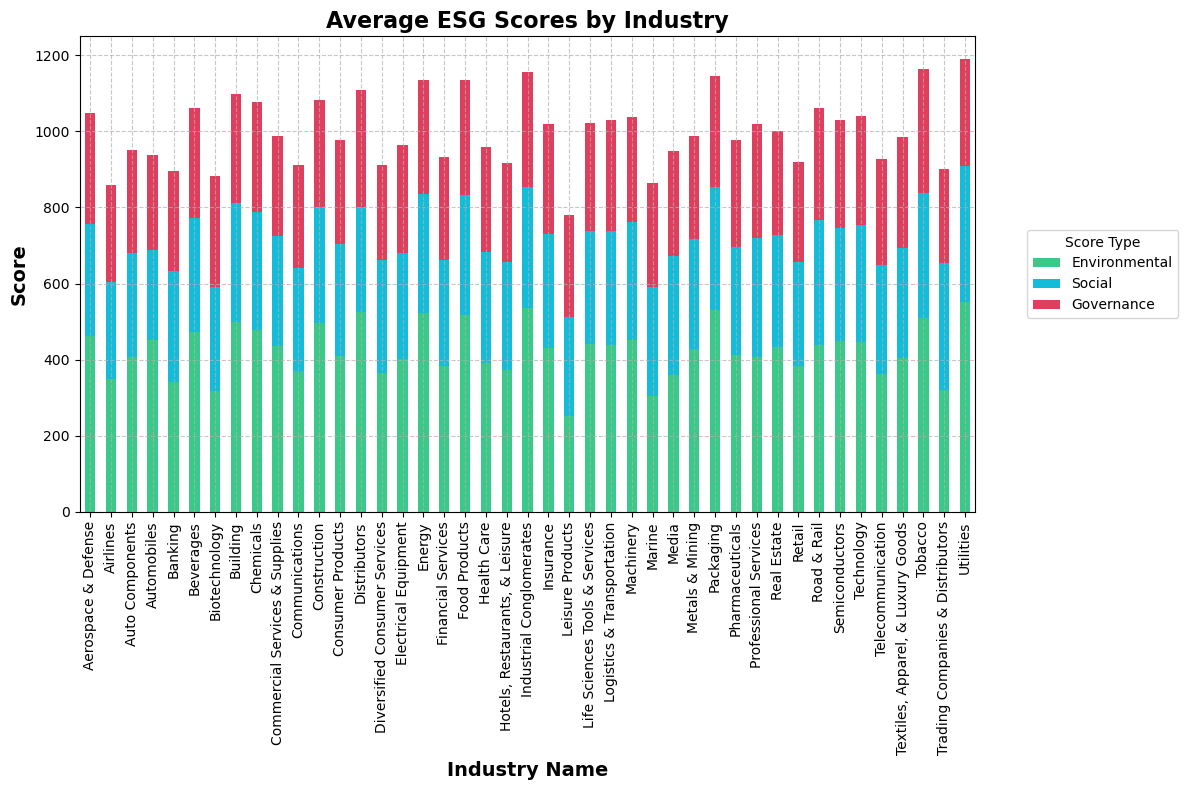

In [ ]:
avg_enviro_by_industry = merged_df.groupby('industry')['environment_score'].mean().reset_index()
avg_enviro_by_industry.columns = ['Industry', 'Average Environmental Score']
avg_social_by_industry = merged_df.groupby('industry')['social_score'].mean().reset_index()
avg_social_by_industry.columns = ['Industry', 'Average Social Score']
avg_gov_by_industry = merged_df.groupby('industry')['governance_score'].mean().reset_index()
avg_gov_by_industry.columns = ['Industry', 'Average Governance Score']

avg_enviro_by_industry_ = avg_enviro_by_industry.rename(columns = {'Average Environmental Score': 'Environmental'})
avg_social_by_industry_ = avg_social_by_industry.rename(columns = {'Average Social Score': 'Social'})
avg_gov_by_industry_ = avg_gov_by_industry.rename(columns = {'Average Governance Score': 'Governance'})
stacked_data = avg_enviro_by_industry_.merge(avg_social_by_industry_, on = 'Industry').merge(avg_gov_by_industry_, on = 'Industry')

fig, ax = plt.subplots(figsize = (12, 8))
stacked_data.set_index('Industry').plot(kind = 'bar', stacked = True, ax = ax, color = ['#39c988', '#13bcd8', '#df3e5d'])
ax.set_title('Average ESG Scores by Industry', fontsize = 16, fontweight = 'bold', horizontalalignment = 'center')
ax.set_xlabel('Industry Name', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Score', fontsize = 14, fontweight = 'bold')
ax.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation = 90)
plt.legend(title = 'Score Type', bbox_to_anchor = (1.05, 0.5), loc = 'center left')
plt.tight_layout()
plt.show()

The industries with the lowest Environmental scores are also Leisure Products, Marine, Biotechnology, Trading Companies & Distributors, and Airlines. the industries with the highest Environmental scores are also Utilities, Industrial Conglomerates, Packaging, Distributors, and Energy. The industries with the lowest Social scores are Automobiles, Leisure Products, Airlines, Biotechnology, and Communications. The industries with the highest Social scores are also Utilities, Trading Companies & Distributors, Road & Rail, Tobacco, and Packaging. The industries with the lowest Governance scores are Airlines, Trading Companies & Distributors, Automobiles, Diversified Consumer Services, and Hotels, Restaurants, & Leisure. The industries with the highest Governance scores are also Tobacco, Distributors, Industrial Conglomerates, Food Products, and Tobacco.

Overall, there are some fluctuations in the breakdown of ESG metrics across industry, but this is to be expected. The variation degree allows us to proceed with creating our average cumulative variable transformations. 

Next, we will do some data wrangling to properly be able to test our hypotheses: namely, we will calculate the average industry level values of the total ESG score, stock percentage change, and 50 day SMA variables to use in our linear regression and hypothesis testing.

In [5]:
industry_data = merged_df.groupby('industry').agg({
    'total_score': 'mean',
    'percentage_change': 'mean',
    '50_day_SMA': 'mean'}).rename(columns={'total_score': 'average_total_esg_score'})

scaler = StandardScaler()
industry_data['average_total_esg_score_scaled'] = scaler.fit_transform(industry_data[['average_total_esg_score']])

To further explore our hypothesis, we will also visualize the relationship between the average total ESG score and percentage change in stock performance across industries. We are plotting percentage change on the y-axis against average total ESG score on the x-axis, and aim to determine whether industries with higher ESG scores tend to exhibit better financial performances, as measured by percentage change in stock price here. Each point represents an industry, and the sizes indicate magnitude of the percentage change. We scaled the color gradient by ESG score as well. 

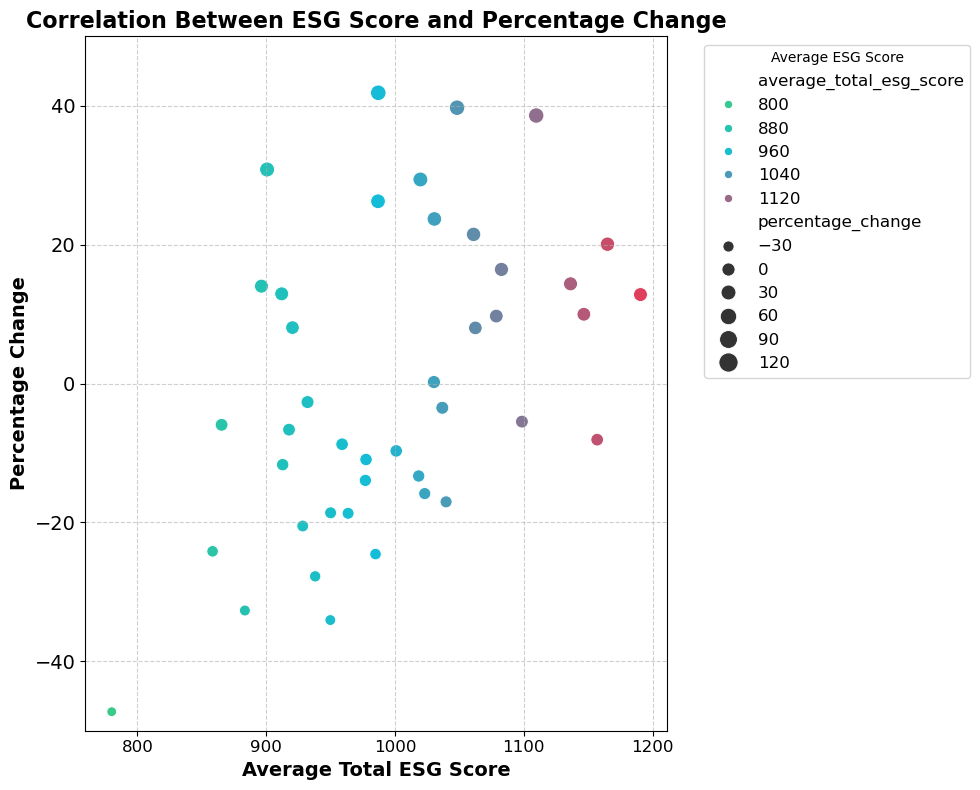

In [ ]:
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#39c988', '#13bcd8', '#df3e5d'])

plt.figure(figsize = (10, 8))
sns.scatterplot(
    data = industry_data,
    x = 'average_total_esg_score',
    y = 'percentage_change',
    hue = 'average_total_esg_score',
    palette = custom_cmap,
    size = 'percentage_change',
    sizes = (50, 200))

plt.title('Correlation Between ESG Score and Percentage Change', fontsize = 16, fontweight = 'bold')
plt.xlabel('Average Total ESG Score', fontsize = 14, fontweight = 'bold')
plt.ylabel('Percentage Change', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.ylim(-50, 50)
plt.legend(title = 'Average ESG Score', fontsize = 12, bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

For our hypothesis, we expect to see a positive trend, which is mostly apparent in the scatterplot above. We also can note that industries with higher ESG scores cluster towards the upper right of the plot, which indicates a correlation between ESG-focused practices and financial returns, which is promising for our analysis. 

Next, we will examine the correlation between the average total ESG score and the 50-day simple moving average (SMA) of stock prices. This analysis, along with the previous plot, will help us understand whether industries with higher ESG scores are associated with smoother or more stable stock price trends over time (better financial performance). This scatter plot will also display the ESG score on the x-axis, the 50-day SMA on the y-axis, and have the size of each point reflect the magnitude of the 50-day SMA. Additionally, the color gradient of the markers will also indicate the magnitude of the ESG score.

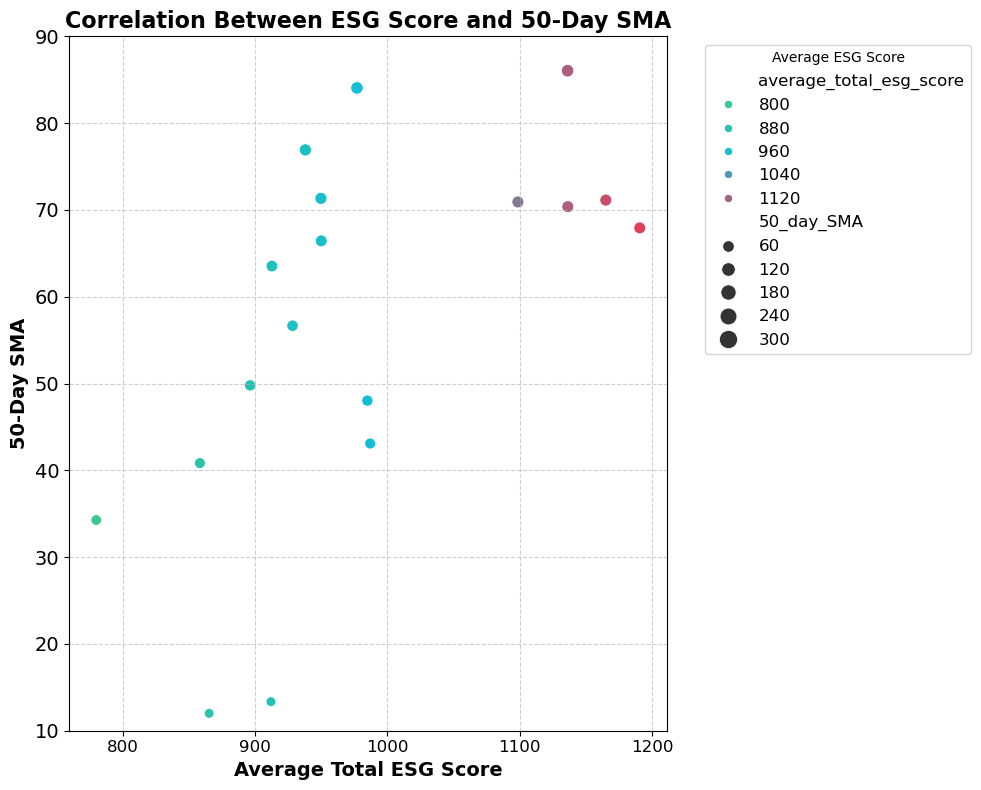

In [ ]:
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#39c988', '#13bcd8', '#df3e5d'])

plt.figure(figsize = (10, 8))
sns.scatterplot(
    data = industry_data,
    x = 'average_total_esg_score',
    y = '50_day_SMA',
    hue = 'average_total_esg_score',
    palette = custom_cmap,
    size = '50_day_SMA',
    sizes = (50, 200))

plt.title('Correlation Between ESG Score and 50-Day SMA', fontsize = 16, fontweight = 'bold')
plt.xlabel('Average Total ESG Score', fontsize = 14, fontweight = 'bold')
plt.ylabel('50-Day SMA', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.ylim(10, 90)  
plt.legend(title = 'Average ESG Score', fontsize = 12, bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

In this plot, we also see a positive linear trend, but not nearly as pronounced as in the previous plot. Additionally, we don't see the clustering of large dots in the upper right hand corner as we do in the previous plot, implying less of a relationship with ESG metrics and the 50-day SMA. This is useful in preparing us for the results of our future analyses. 

Now, we will look to linear regression models and hypothesis testing to examine exact statistical significance. By scaling the `average_total_esg_score`, we aim to standardize the data, which will help in assessing the true relationship between ESG performance and percentage change more accurately. The following linear regression model we create will test the strength and significance of this correlation, which will help us determine whether ESG scores have a measurable effect on stock performance across industries.

In [8]:
scaler = StandardScaler()
industry_data['average_total_esg_score_scaled'] = scaler.fit_transform(industry_data[['average_total_esg_score']])

X_linear_pc = industry_data[['average_total_esg_score_scaled']]
y_linear_pc = industry_data['percentage_change']
X_linear_pc = sm.add_constant(X_linear_pc)

linear_model_pc = sm.OLS(y_linear_pc, X_linear_pc).fit()
print("LINEAR regression results for PERCENTAGE CHANGE:")
print(linear_model_pc.summary())

LINEAR regression results for PERCENTAGE CHANGE:
                            OLS Regression Results                            
Dep. Variable:      percentage_change   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     12.60
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           0.000984
Time:                        15:42:04   Log-Likelihood:                -199.68
No. Observations:                  43   AIC:                             403.4
Df Residuals:                      41   BIC:                             406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

As seen above, the linear regression results for the percentage change in stock performance indicate a statistically significant relationship with the scaled average total ESG score variable. The R-squared value of 0.235 implies that approximately 23.5% of the variation in percentage change is explained by the average ESG score, which is a moderate but notable amount. Additionally, the p-value for the ESG coefficient is 0.001, which is well below the 0.05 significance threshold, allowing us to reject the null hypothesis and conclude that there is a statistically significant positive relationship between ESG performance and percentage change.

The next step in our analysis is to assess the impact of ESG scores on the 50-day SMA, our other measure of financial performance. We will perform a similar linear regression to test whether the relationship observed for percentage change also holds for this stock performance metric.

In [9]:
X_linear_sma = industry_data[['average_total_esg_score_scaled']]
y_linear_sma = industry_data['50_day_SMA']
X_linear_sma = sm.add_constant(X_linear_sma)

linear_model_sma = sm.OLS(y_linear_sma, X_linear_sma).fit()
print("LINEAR regression results for 50-DAY-SMA:")
print(linear_model_sma.summary())

LINEAR regression results for 50-DAY-SMA:
                            OLS Regression Results                            
Dep. Variable:             50_day_SMA   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.1752
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.678
Time:                        15:42:04   Log-Likelihood:                -247.97
No. Observations:                  43   AIC:                             499.9
Df Residuals:                      41   BIC:                             503.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

As seen above, the linear regression results for the 50-day SMA actually reveal a very weak relationship with the scaled average total ESG score variable, as demonstrated by an R-squared value of 0.004. This indicates that only 0.4% of the variance in the 50-day SMA is explained by ESG scores, which is basically negligible. Furthermore, the p-value for the ESG coefficient is 0.678, which is much higher than the 0.05 significance threshold, suggesting that the relationship between ESG scores and the 50-day SMA is not statistically significant. Consequently, we fail to reject the null hypothesis, indicating that ESG performance does not have a significant positive effect on the 50-day SMA in this dataset.

Next, we will conduct a hypothesis test to statistically evaluate the positive of ESG scores on stock percentage change, using the results from the previous linear regression. We will calculate the t-statistic and p-value for the ESG coefficient in the regression model to determine if the positive correlation we observed is statistically significant.

In [10]:
esg_coefficient_pc = linear_model_pc.params['average_total_esg_score_scaled']
esg_standard_error_pc = linear_model_pc.bse['average_total_esg_score_scaled']

t_statistic_pc = esg_coefficient_pc / esg_standard_error_pc
p_value_one_tailed_pc = 1 - stats.t.cdf(t_statistic_pc, df = linear_model_pc.df_resid)

print(f"\nLINEAR regression test for βESG > 0 (Percentage Change)")
print(f"dep var: percentage_change")
print(f"ESG coeff: {esg_coefficient_pc}")
print(f"t-stat: {t_statistic_pc}")
print(f"p-value: {p_value_one_tailed_pc}")

if p_value_one_tailed_pc < 0.05:
    print(f"Reject the null: ESG has a significant positive effect on stock change!")
else:
    print(f"Fail to reject the null :()")


LINEAR regression test for βESG > 0 (Percentage Change)
dep var: percentage_change
ESG coeff: 13.941151981258898
t-stat: 3.5497203897934275
p-value: 0.0004920424905991982
Reject the null: ESG has a significant positive effect on stock change!


The hypothesis test for percentage change shows a positive coefficient for ESG (13.9412), indicating a positive relationship between ESG scores and stock price percentage change. The test statistic of 3.550 and p-value of 0.001 (rounded) are both significant, with the p-value being well below the 0.05 significance threshold. This again leads us to reject the null hypothesis and conclude that ESG scores have a statistically significant positive effect on stock percentage changes. This result aligns with the visual trend in the scatterplot observed earlier, where industries with higher ESG scores tended to show more favorable financial performance.

Next, we will perform a similar hypothesis test for the 50-day SMA. We will evaluate whether ESG scores have a significant positive effect on this metric using the results from the linear regression model, similar to the process followed for percentage change.

In [11]:
esg_coefficient_sma = linear_model_sma.params['average_total_esg_score_scaled']
esg_standard_error_sma = linear_model_sma.bse['average_total_esg_score_scaled']

t_statistic_sma = esg_coefficient_sma / esg_standard_error_sma
p_value_one_tailed_sma = 1 - stats.t.cdf(t_statistic_sma, df = linear_model_sma.df_resid)

print(f"\nLINEAR regression test for βESG > 0 (50-Day SMA)")
print(f"dep var: 50_day_SMA")
print(f"ESG coeff: {esg_coefficient_sma}")
print(f"t-stat: {t_statistic_sma}")
print(f"p-value: {p_value_one_tailed_sma}")

if p_value_one_tailed_sma < 0.05:
    print(f"Reject the null: ESG has a significant positive effect on 50-day SMA!")
else:
    print(f"Fail to reject the null :(")


LINEAR regression test for βESG > 0 (50-Day SMA)
dep var: 50_day_SMA
ESG coeff: 5.05238758658085
t-stat: 0.4185127460311828
p-value: 0.33887824765083363
Fail to reject the null :(


The hypothesis test for 50-day SMA reveals a coefficient of 5.0524, implying a positive relationship between ESG scores and the 50-day SMA. However, the test statistic of 0.4185 and p-value of 0.3389 indicate that the result is not statistically significant, as the p-value exceeds the 0.05 significance threshold. Therefore, we fail to reject the null hypothesis, meaning that there is no evidence to suggest that there is a significant positive effect of ESG scores on the 50-Day SMA based on this data.

In the next step, we will visualize the linear regression results for percentage change, to corroborate the results from our linear regression and hypothesis testing. We will plot different industries' scaled average total ESG score against their stock percentage change (on the x- and y- axes respectively ), and will also incorporate the regression line of best fit to examine how well the model fits the data.

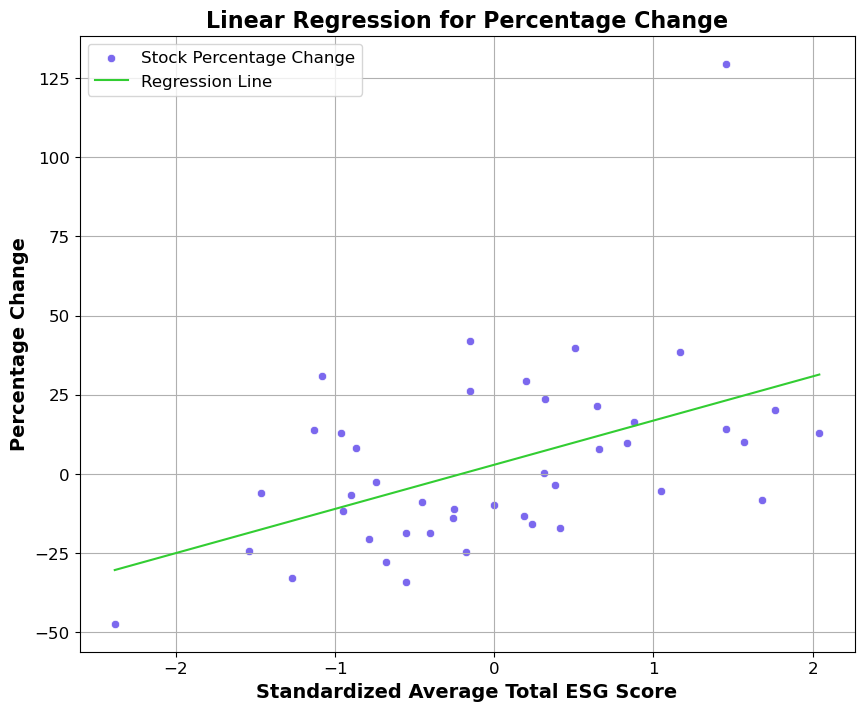

In [12]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = industry_data['average_total_esg_score_scaled'], y = industry_data['percentage_change'], color = 'mediumslateblue', label = 'Stock Percentage Change')
sns.lineplot(x = industry_data['average_total_esg_score_scaled'], 
             y = linear_model_pc.predict(X_linear_pc), 
             color = 'limegreen', label = 'Regression Line')
plt.title('Linear Regression for Percentage Change', fontsize = 16, fontweight = 'bold')
plt.xlabel('Standardized Average Total ESG Score', fontsize = 14, fontweight = 'bold')
plt.ylabel('Percentage Change', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.grid(True)
plt.show()

From the plot, we can see a moderate linear relationship amongst the data points, which implies that our model, being linear, had good fit. This corroborates the results we got from our linear regression and hypothesis testing, where we were able to reject the null hypothesis. Additionally, all of the dots are close to the regression line (no extreme outliers), which helps prove the overall good fit of the model.

Finally, we will do the same visualization involving 50-day SMA and scaled average total ESG score, as well as a regression line of best fit.

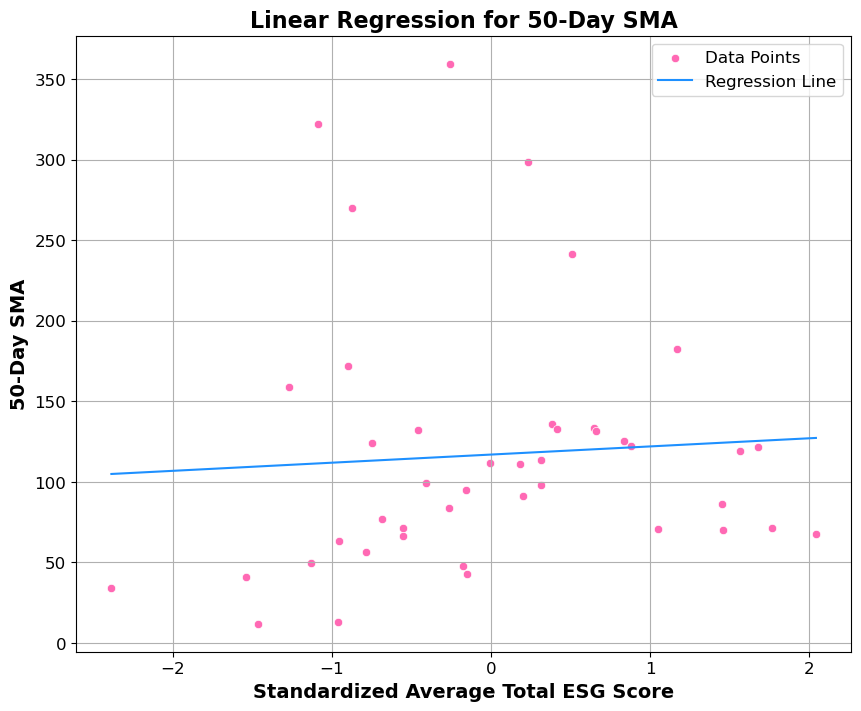

In [13]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = industry_data['average_total_esg_score_scaled'], y = industry_data['50_day_SMA'], color = 'hotpink', label = 'Data Points')
sns.lineplot(x = industry_data['average_total_esg_score_scaled'], 
             y = linear_model_sma.predict(X_linear_sma), 
             color = 'dodgerblue', label = 'Regression Line')
plt.title('Linear Regression for 50-Day SMA', fontsize = 16, fontweight = 'bold')
plt.xlabel('Standardized Average Total ESG Score', fontsize = 14, fontweight = 'bold')
plt.ylabel('50-Day SMA', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.grid(True)
plt.show()

From the plot, we can see the relationship between 50-day SMA and scaled average total ESG score is much less linear than the previous plot, and we have worse fit for the model. There are points that are very far away from the regression line of best fit, confirming that there isn't a strong linear trend between the two variables, and the relationship is weaker. 

In general, further analysis of the results in Analysis 1 is found in Evaluation of Significance.

### __Analysis 2__

For Hypothesis 2, we need to divide companies into two categories: companies with "High" versus "Not High" ESG total grade (given as a letter score, not a numerical value). This bar chart visualizes the distribution of companies based on their total ESG grades, categorized into four distinct grades: A, BBB, BB, and B. The x-axis represents the ESG grades, while the y-axis indicates the count of companies within each grade category.

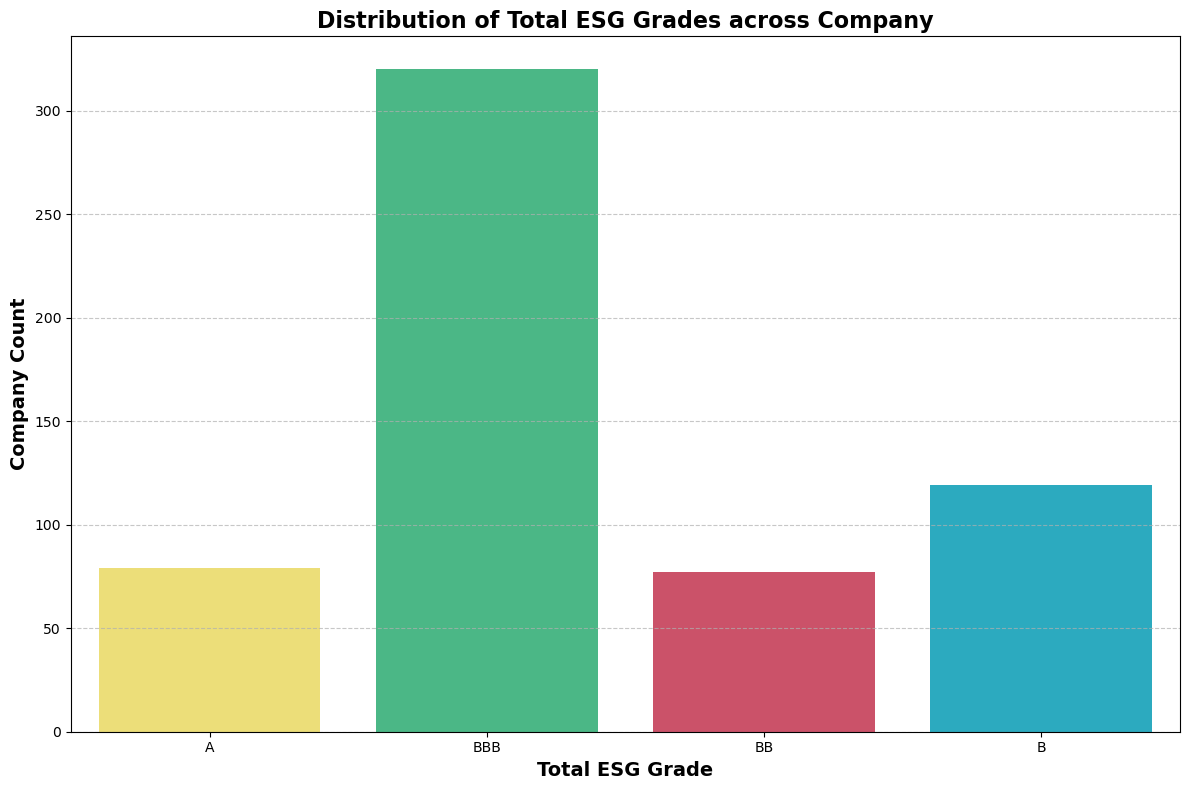

In [50]:
grade_order = ['A', 'BBB', 'BB', 'B']
custom_palette = ['#39c988', '#13bcd8', '#df3e5d', '#ffed66']

plt.figure(figsize = (12, 8))
sns.countplot(data = merged_df, x = 'total_grade', order = grade_order, hue = 'total_grade', palette = custom_palette)
plt.title('Distribution of Total ESG Grades across Company', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total ESG Grade', fontsize = 14, fontweight = 'bold')
plt.ylabel('Company Count', fontsize = 14, fontweight = 'bold')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

Evidently, the grade 'BBB' dominates the distribution with the highest count, followed by 'B', while grades 'A' and 'BB' have relatively lower counts. This plot shows the distribution of the number of companies in each ESG grade, so we will combine the 2 highest and 2 lowest categories. In the following code chunk, we will define "A" and "BBB" as "High" ESG grades, "BB" and "B" as "Not High" ESG grades.

In [ ]:
# dividing data to two sets: total_grade == BBB or A (high ESG level), total_grade = B or BB (median or low ESG level)
pop_high = merged_df[(merged_df['total_grade'] == 'BBB') | (merged_df['total_grade'] == 'A')]
pop_not_high = merged_df[(merged_df['total_grade'] == 'BB') | (merged_df['total_grade'] == 'B')]

#generate Correlation array between total_score and percentage_change
pop_r_high = pop_high['percentage_change'].corr(pop_high['total_score'])
pop_r_not_high = pop_not_high['percentage_change'].corr(pop_not_high['total_score'])

#size of high / not_high subsets
pop_n_high = pop_high.shape[0]
pop_n_not_high = pop_not_high.shape[0]

#create correlation matrix
corr_bbb = pop_high[["percentage_change", "total_score"]].corr()
corr_bb_b = pop_not_high[["percentage_change", "total_score"]].corr()

Now, before starting our hypothesis test, we will examine the variable of total ESG score and its correlations with the percentage change variable, for both companies with a "High" total ESG grade, as well as a "Not High" total ESG grade, referred to in the visualization as "Low".

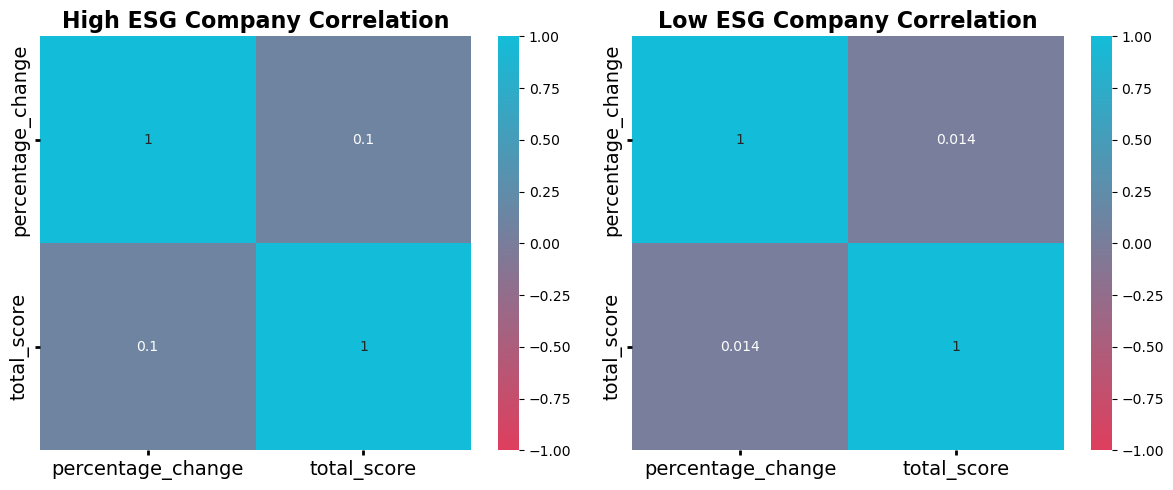

In [ ]:
custom_cmap = LinearSegmentedColormap.from_list("custom_red_blue", ['#df3e5d', '#13bcd8'])

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.heatmap(corr_bbb, annot = True, cmap = custom_cmap, vmin = -1, vmax = 1, ax = axes[0])
axes[0].set_title("High ESG Company Correlation", fontsize = 16, fontweight = 'bold')
axes[0].tick_params(axis = 'both', labelsize = 14, width = 2, which = 'both')

sns.heatmap(corr_bb_b, annot = True, cmap = custom_cmap, vmin = -1, vmax = 1, ax = axes[1])
axes[1].set_title("Low ESG Company Correlation", fontsize = 16, fontweight = 'bold')
axes[1].tick_params(axis = 'both', labelsize = 14, width = 2, which = 'both')

plt.tight_layout()
plt.show()

According to the correlation plot, the correlation between the total ESG score and stock percentage change for companies with a "High" total ESG grade is 0.1, and the correlation between total ESG grade and stock percentage change for companies with a "Low" (or "Not High") total ESG grade is 0.016. This is a small difference, but in order to test if this difference is statistically significant, we will run a 2-tailed Z-test. For the sake of organization, we defined our own function that will conduct a Z-test for the difference in two correlation coefficients, and then called the function in the subsequent code chunk.

In [17]:
def z_test_correlation(n1, r1, n2, r2, alpha = 0.05):
    """
    Perform Z-test for the difference between two correlation coefficients.
    
    Parameters:
    n1 (int): Sample size of the first group
    r1 (float): Correlation coefficient of the first group
    n2 (int): Sample size of the second group
    r2 (float): Correlation coefficient of the second group
    alpha (float): Significance level for hypothesis testing (default is 0.05)
    
    Returns:
    float: Z-score for the difference in correlations
    float: p-value for the test
    str: Interpretation of the result
    """
    # Step 1: Convert correlation coefficients to Z scores
    z1 = np.arctanh(r1)
    z2 = np.arctanh(r2)
    
    # Step 2: Calculate the SE for the difference in Z scores
    se_diff = np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))
    
    # Step 3: Calculate the Z score for the difference between the two correlation coefficients
    z_score = (z1 - z2) / se_diff
    print(f"Z-score is : {z_score}")
    
    # Step 4: Calculate the p-value (two-tailed)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    print(f'P value is: {p_value}')
    
    if p_value < alpha:
        interpretation = "The difference in correlation coefficients is statistically significant."
    else:
        interpretation = "The difference in correlation coefficients is not statistically significant."
    
    return interpretation

In [ ]:
z_test_correlation(pop_n_high, pop_r_high, pop_n_not_high, pop_r_not_high)

Z-score is : 1.015197189427876
P value is: 0.3100118400891345


'The difference in correlation coefficients is not statistically significant.'

As shown by the 2-sided Z-test results, we fail to reject our null hypothesis, with a z-score of about 0.9995 and a p-value of about 0.3175. In other words, we do not have statistically significant evidence to conclude that there is a significant difference between the true population correlation coefficients. Further analysis of this result is found in Evaluation of Significance.

### __Analysis 3__

In Analysis 2, we categorized the company data into two groups: "High" and "Not High"  total ESG-grade having companies. While Hypothesis 2 indicates an insignificant difference in the population correlation between total ESG score and stock percentage change, the difference in the stock rate of return change for companies with "High" versus "Not High" total ESG grades remains in question. To address this, we will build on Analysis 2, and conduct a z-test to determine if there is statistically significant evidence of a difference in the stock percentage change between companies with "High" versus "Not High" total ESG grades. 

In [ ]:
#percentage_change average for each group
pop_return_high = pop_high['percentage_change'].mean()
pop_return_not_high = pop_not_high['percentage_change'].mean()
#percentage_chanege std for each groups
pop_return_high_std = pop_high['percentage_change'].std()
pop_return_not_high_std = pop_not_high['percentage_change'].std()
# sample sizes for each group
pop_n_high = pop_high.shape[0]
pop_n_not_high = pop_not_high.shape[0]

In the next step, we'll visualize the average stock percentage change for two groups: companies with "High" versus "Not High" total ESG grades (referred to in the visualization as "High" versus "Low"). This box plot will help in our understanding of the numerical difference between the mean of the percentage changes of the two groups, and help us proceed with further statistical testing on the numerical values.

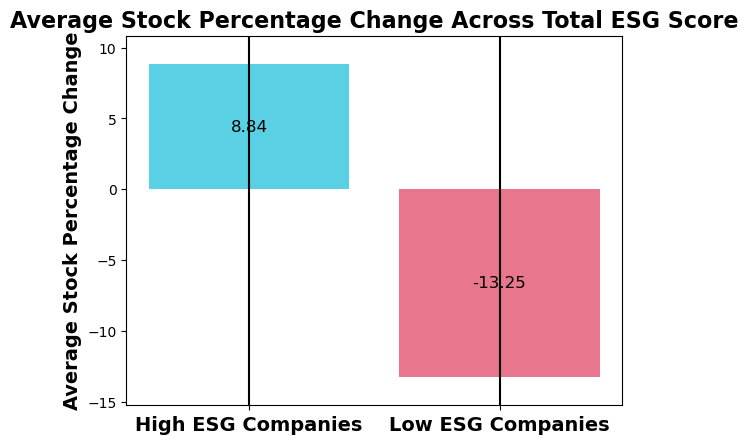

In [60]:
categories = ['High ESG Companies', 'Low ESG Companies']
means = [pop_return_high, pop_return_not_high]
std_devs = [pop_return_high_std, pop_return_not_high_std]

bars = plt.bar(categories, means, yerr = std_devs, capsize = 5, alpha = 0.7, color = ['#13bcd8', '#df3e5d'])

for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{mean:.2f}', ha = 'center', va = 'center', color = 'black', fontsize = 12)

plt.ylabel('Average Stock Percentage Change', fontsize = 14, fontweight = 'bold')
plt.title('Average Stock Percentage Change Across Total ESG Score', fontsize = 16, fontweight = 'bold')
plt.ylim(min(means) - 2, max(means) + 2)
plt.xticks(fontsize = 14, fontweight = 'bold')
plt.yticks()
plt.show()

The bar chart above illustrates the average percentage change for two groups: "High" and "Not High" total ESG-scoring companies, and the y-axis captures the mean percentage change. The "High" group shows a positive average percentage change of 8.84, while the "Not High" group exhibits a negative average percentage change of -13.67. These two averages, or means appear to be quite different - from the plot, we can observe a notable difference in the mean percentage change between the two groups. To determine whether this difference is statistically significant, we will conduct a one-sided Z-test on the group means. In order to do this again, we defined our own function to conduct a one-sized Z-test, and called the function in the subsequent chunk.

In [21]:
def z_test_mean_greater(mean1, std1, n1, mean2, std2, n2, alpha=0.05):
    """
    Perform one-tailed Z-test to check if the mean of the first group is greater than the mean of the second group.
    
    Parameters:
    mean1 (float): Mean of the first group
    std1 (float): Standard deviation of the first group
    n1 (int): Sample size of the first group
    mean2 (float): Mean of the second group
    std2 (float): Standard deviation of the second group
    n2 (int): Sample size of the second group
    alpha (float): Significance level for hypothesis testing (default is 0.05)
    
    Returns:
    float: Z-score for the difference in means
    float: p-value for the test
    str: Interpretation of the result
    """
    # Step 1: Calculate the standard error of the difference between the means
    se_diff = np.sqrt((std1**2 / n1) + (std2**2 / n2))
    
    # Step 2: Calculate the Z score for the difference between the two means
    z_score = (mean1 - mean2) / se_diff
    print(f"Z-score is : {z_score}")
    # Step 3: Calculate the p-value (one-tailed test)
    p_value = 1 - norm.cdf(z_score)  # Only interested in the probability of mean1 > mean2
    print(f'P value is: {p_value}')
    # Step 4: Interpretation
    if p_value < alpha:
        interpretation = "The mean of the first group is significantly greater than the mean of the second group."
    else:
        interpretation = "The mean of the first group is not significantly greater than the mean of the second group."
    
    return interpretation

In [ ]:
z_test_mean_greater(pop_return_high, pop_return_high_std, pop_n_high, pop_return_not_high, pop_return_not_high_std, pop_n_not_high)

Z-score is : 3.902923148596247
P value is: 4.751894290055958e-05


'The mean of the first group is significantly greater than the mean of the second group.'

Based on the result generated from the Z-test, we are able to reject our null hypothesis, with a z-score of about 4.0036 and a p-value of about 0.00003. In other words, we have statistically significant evidence to conclude that there is a significant difference between the average percentage change in stock price of companies with "High" total ESG grades, versus companies with "Not High" total ESG grades. Again, further analysis of this result is found in Evaluation of Significance.

## __Evaluation of Significance__

### Hypothesis 1:
The analysis in this section reveals a significant positive relationship between the scaled average total ESG score and stock percentage change, supporting our initial hypothesis that industries with higher ESG scores tend to exhibit better financial performance in terms of year-long stock returns. The regression results show an ESG coefficient (βESG) of 13.9412, with a highly significant p-value of 0.001, well below the α = 0.05 threshold. The R-squared value of 0.235 indicates that approximately 23.5% of the variation in stock percentage change is explained by ESG scores, a meaningful proportion in this context. The hypothesis test further confirmed these findings, allowing us to reject the null hypothwsis and conclude that ESG scores have a statistically significant and positive effect on percentage change in stock performance. The visualizations, including the scatterplot with a regression line and the distributions of the variables corroborated these results and showcased a clear positive trend and a good model fit, with no extreme outliers disrupting the linear relationship. Overall, this part of Analysis 1 strengthens the conclusion that ESG practices contribute to enhanced short-term stock performance at the industry level.

Conversely, the analysis of the 50-day Simple Moving Average (SMA) did not reveal a statistically significant relationship between ESG scores and the metric. The ESG coefficient was rather small (5.0524) and had a p-value of 0.678, which is far greater than the chosen significance threshold. An R-squared value of 0.004 further showed that ESG scores explain less than 1% of the variation in the 50-day SMA, suggesting a pretty much negligible relationship. These findings were supported by the visual analysis we did, where the plots demonstrated a weak linear trend and poor model fit, with data points scattered far from the regression line. Consequently, we fail to reject the null hypothesis, concluding that ESG scores do not have a significant effect on this measure of financial performance. 

Together, these results indicate that while ESG metrics may enhance certain aspects of financial performance (i.e - stock percentage change over time for a company), they do not uniformly have an association with all financial indicators. 


### Hypothesis 2:
In this section, the analysis reveals a very small difference in the correlation coefficients between total ESG scores and stock percentage change, when comparing companies with "High" ESG total grades ('BBB' and 'A') and companies with "Not High" ESG levels (grades 'BB' and 'B'). For companies with "High" total ESG grades, the correlation coefficient was 0.1, while for companies with "Not High" total ESG grades, the correlation was 0.016. Initially, this suggested a slightly stronger linear relationship between ESG scores and stock performance in companies with better total ESG grades. However, the two-sided Z-test for the difference between the two correlation coefficients produced a z-score of 1.0152 and a p-value of 0.3100, which exceeds the chosen 0.05 significance threshold. Consequently, we failed to reject the null hypothesis, and conclude that there is no statistically significant difference in the correlation coefficients for the two groups. While there may be a modest trend between the variables, it is not robust enough to draw firm conclusions. This is consistent with the visualizations of the data, as the heatmaps of the correlation matrices also showed a very small difference in the correlation strengths between the two groups. Overall, this suggests the relationship between ESG scores and stock performance might not vary significantly by ESG grade, which goes against our initial hypothesis, and is of interest to us, and it presents a new level of nuance in our project. We evaluate that while ESG levels may indicate a general trend, impact on stock performance correlation specifically might not as pronounced as we hypothesized.
   
Given the lack of significant difference in the correlation levels, we decided to shift our focus from correlation coefficiens to examining the direct relationship between ESG levels and stock returns. This approach aims to provide deeper insights into our variables, and aligns more closely with our research objective, which seeks to explore the associations between company, stock performance, and ESG ratings. Therefore, we added a new hypothesis onto our analysis (prior to actually running it, so there is no concern of p-hacking!).
 

### Hypothesis 3:
Finally, the analysis in this section did provide strong evidence to support our original hypothesis that companies with "High" ESG total grades exhibit a significantly greater average stock percentage change than those with "Not High" ESG total grades. The "High" group had a positive average percentage change of 8.84, while the "Not High" group demonstrated a negative average percentage change of -13.67. A one-tailed Z-test for the difference in means demonstrated a z-score of 3.903 and a p-value of 0.00005, which is far below the chosen 0.05 significance threshold. This allows us to reject the null hypothesis, and conclude that companies with higher ESG total grades experience significantly greater stock price growth. The bar chart visualization serves to highlight and corroborate the difference between the means, and shows a clear separation between the two categories. These results also align with prior research that has suggested a positive relationship between ESG performance and financial outcomes - the statistical significance of the difference helps provide evidence for the narrative that "High" ESG performance can be associated with improved stock performance.

--- 
## __Conclusions__ 

In regards to the first analysis, we can conclude that our hypothesis that industries with higher total ESG scores experience better stock performance is partially supported. In specific, our hypothesis testing indicates a significant positive relationship between ESG scores and stock percentage change (in particular), as shown by the highly significant p-values in both the linear and logistic regression analyses. This suggests that ESG scores might play a significant role in influencing stock performance in terms of percentage change only. However, we were not able to provide statistical significance for the ESG coefficients that predicting 50-day SMA performance, which implies  the relationship between ESG scores and stock performance as measured by 50-day SMA performance is not as robust. Thus, we have evidence for the claim that ESG scores are a relevant factor for some dimensions of financial performance, but their overall impact on industry-level stock performance should utilize further exploration, especially for oother metrics beyond percentage change. In other words, while our analysis shows that higher ESG scores are positively associated with stock performance in terms of percentage change, the same relationship does not expand to all stock performance metrics, such as 50-day SMA performance. By exploring additional variables, we could potentially better understand how ESG scores serve as a driver of overall stock performance, not just percentage change, at the industry level.


Our analysis also revealed a statistically significant positive relationship between ESG ratings and the rate of return on stocks at company level. Specifically, companies with a "High" total ESG level (A or BBB) exhibited a significantly higher average rate of return compared to those with "Not High" ESG levels (BB or B). This finding is consistent with previous research by La Torre, Mango, Cafaro, and Leo (2020) and Friede, Busch, and Bassen (2015), which suggests that stronger ESG performance is positively associated with improved financial outcomes. By focusing on industry-level trends, our study provides new insights into how ESG considerations drive broader market performance beyond individual firm volatility.    
   
At the same time, our analysis of the differences in correlation strength between ESG levels and stock returns revealed no statistically significant evidence. This suggests that the relationship between ESG scores and stock returns remains relatively consistent across ESG levels.    
   
These findings emphasize the strategic value of ESG as a predictor of financial growth. Industries with higher ESG ratings demonstrate that integrating sustainable practices is not just an ethical imperative but offers financial advantage. This supports the notion that ESG considerations are becoming critical to competitive advantage in capital markets. Investors can leverage ESG ratings to identify industries with strong growth potential, while policymakers and corporate leaders can use these insights to emphasize ESG initiatives as drivers of both sustainable development and financial success. Our study’s focus on the industry level offers a fresh perspective, moving beyond firm-specific analyses and highlighting ESG’s macroeconomic impact. Future studies could investigate the causal pathways linking ESG performance to financial outcomes, explore time-lagged effects of ESG improvements, or examine industry-specific and regional differences in ESG’s impact on stock performance.   
   
In conclusion, our research affirms the importance of ESG as a meaningful indicator of stock performance at the industry level. It provides actionable insights for investors, policymakers, and corporate leaders, reinforcing the role of sustainability in fostering both economic success and responsible growth.   

---
## __Limitations__  

(aka, limitations of not just the analysis-ready dataset, but factoring in entire project)

1.  Some specific data from the yfinance library is missing - we had to drop all companies that didn't have the specified data we wanted in our specified time range. We also had to drop all companies from the original ESG csv that had missing or blank data. Overall, this means that our analyses will not be perfectly representative of all companies that use USD and have an ESG rating (can't perfectly generalize to the population). Additionally, we filtered our original ESG dataframe to be just companies traded in USD, so we can't do any inter-country comparison (although this also helps us narrow the scope of our project). Since we are also only using companies that are existent and large/mid-cap within 2/1/21 - 12/31/22, any company that stopped their operations in this time frame will be excluded. In other words, our findings might disproportionally overestimate the relationship between ESG scores and stock performance (companies that went bankrupt or have poor ESG / financial outcomes are not represented, which might skew interpretation of ESG positively).


2. ESG is typically evaluated annually, which might mean the scores in our dataset don't reflect the most accurate performance of the company, which directly impacts the analyses and conclusions we might draw. In other words, when considering the short-term impact of the company's ESG and other policies, it's likely that policy change affect stocks immediately, but these changes might not also be reflected in the company's ESG rating. Bascially, since ESG scores lag behind the stock fluctuations due to immediate events (mergers, acqusitions, freak events like the CrowdStrike failure), any significant events that occur during 2/1/21-12/31/22 may result in stock price changes that do not perfectly correlate to ESG metrics. This could skew our correlation or regression model analysis, so we want to be careful to not falsely attributing any stock changes to ESG scores (in case of possible confounding variables). As a caveat, we should also be careful not to infer any causal relations when correlation exists. 


3. ESG is a constant value that is gathered from different days for each company in 2022, though stock prices for these companies change over time every day. We cannot perform any time-series analyses with ESG due to this fact, which limited what we could analyze for our Analysis section. Also, due to the nature of the Kaggle csv and yfinance data, our data was restricted to the variable types of stock data, industry type, company name, and ESG score - which actually did help us narrow down the scope of our research question, but limits the breadth of the analyses we can perform as well.


4. For our first pre registration statement, we wanted to look at both the measures of financial return and 50-day SMA and test if there was a significant difference between companies that have higher ESG and lower ESG for these specific metrics. We found that financial return had a significant difference, but we were unable to conclude the same for 50-day SMA, which means that technically we are not able to conclude that companies with higher ESG scores always outperform other companies in terms of financial metrics, only in terms of stock percentage change/return in this case. A good venture for further analysis would be to investigate associations of ESG with other financial variables not present in this analysis. 


5. As we aggregate ESG score and stock performance at the industry level, we run the risk of obscuring intra-industry flucations or trends: aka companies with higher ESG scores within a single industry might outperform the other companies in the industry. This same effect might be diminished when they are averaged with the lower-performing companies, which might affect the interpretation of our results. In specific, our finding interpretations might underestimate the benefits of ESG score and targeted strategies upon economic performance. Also, ESG scores themselves might be inconsistent across companies due to differences in the way they report their ESG performance. This variability might lead to misinterpretations of the strength or significance of ESG factors, as companies with poor data quality may skew our results, which would again make it difficult to assess the true impact of ESG practices on financial performance.


5. Another aspect worth mentioning again is that our analysis does not account for all potential external variables that could influence stock performance (such as political events...), which may again overshadow the effect of ESG scores, leading to misleading conclusions about the correlation between ESG and stock performance. Expanding our timespan of the data and perhaps comparing different time periods may assist in overcoming this, as a future venture for the project. It is also worth touching on again that our limited scope of the dataset means that we should be cautious when making broad, generalized conclusions about the wider market. Our findings are valid within the context of our data, but further analysis is necessary to see if the same is true for other financial periods and metrics.

---
## __Acknowledgements and Bibliography__ 

In creating our initial research question and finding a initial dataset, we relied mainly on our own interests, browsing Kaggle, and an article from Ernst & Young (2). In creating our analysis-ready dataset, we utilized a .csv file from Kaggle user Alistair King (https://www.kaggle.com/alistairking), a New York-based Kaggle Datasets Grandmaster. They uploaded a Kaggle dataset entitled Public Company ESG Ratings Dataset (5), a link to which can also be found on our GitHub (as well as the downloaded csv - see Data Description and Cleaning.) We then cleaned and joined this dataset to extracted data from the yfinance Python library, created by Ran Aroussi (https://aroussi.com/) as a way around the 2017 Yahoo Finance API deprecation (1).

In determining which preregistration statements and analyses are commonly investigated when dealing with variables of financial performance and ESG, we consulted 2 published studies (3, 6). These sources allowed us to understand what types of analyses are normally performed when testing financial metrics for significant changes, and informed our own hypothesis test choices.

To run our hypothesis tests and create our models in Data Analysis, we referenced the lecture slides as well as some external resources (4, 7). As we are both Statistical Science majors (with one of us also being a double Economics major), we are familiar with regression methods and hypothesis testing, so we did not consult office hours or Ed Discussion for this portion. We are both also fairly familiar with how stock markets and fluctuations work, so we did not need to consult a lot of external resources to aid in interpreting our results. 

For help in writing the Data Analysis code (specifically, the sections where we created our own function to help in running a statistical test), we utilized ChatGPT (*), with the first prompt for Analysis 1 akin to “how can we devise our own function in Python that will perform a Z-test for the difference between two correlation coefficients? We want to include the standardization of the correlation coefficients to z scores, calculate the z scores for the difference in correlation coefficients,  and calculate the two-tailed p-value. We also want to include an interpretation, where if we obtain a p-value less than 0.05, we can reject the null hypothesis, but if we do not, then we fail to reject the null hypothesis.” We repeated this prompt for the second part of Analysis 2, but instead, we asked for “a function that performs a one-tailed Z-test to check if the mean of the first group is greater than the mean of the second group. Initially, we searched the Python documentation to see if there was already a function or library that would run the test of means, and decided to write our own to best suit our needs for this project. We were confident in the code outputted by ChatGPT as we are both familiar with the overall methodology of performing a statistical test by hand, and the generated code had all of the specific steps that we specified and that are normally included in the process.

Additionally, in our Data Description and Cleaning section, in our data_cleaning.ipynb, we utilized ChatGPT to help us in the extracting of certain information from the yfinance library so that we could join it to our working dataset. Specifically, we utilized ChatGPT to help us find a way to prevent the yfinance library from manually printing out every row of the data that was being joined, as that would have resulted in a 620~ line output (which would be basically incomprehensible.) The prompt was something along the lines of us pasting the code chunk, pasting a snippet of the output that it was producing, and asking "How can we prevent this output from printing while the code chunk is running?". We can attest to the code produced as it successfully prevents the lines from being printed when the code chunk is run, and comparing the dataset before and after the code chunk is run showcases that the correct 4 financial metrics were added to every relevant line of the dataset.

Finally, again in our Data Analysis, we very minorly utilized ChatGPT to assist with our visualizations, particularly for trying to input custom color palettes into our plots (using the LinearSegmentedColormap). However, we would like to note that the ideas and decisions behind all of our analyses and visualizations present were formulated without AI assistance. We also extensively used the Python documentation to optimize the visual clarity and effectiveness of our plots (there are a lot of cool arguments that help plots look nicer that we didn't touch on explicitly in class). 

      
Scholarly Materials:

    (1) Allen, R. (2023). yfinance: Yahoo Finance market data downloader. PyPI. Retrieved December 9, 2024, from https://pypi.org/project/yfinance/

    (2) Ernst & Young LLP (2023). Why ESG performance is growing in importance for investors. EY Insights.

    (3) Friede, G., Busch, T., & Bassen, A. (2015). ESG and financial performance: aggregated evidence from more than 2000 empirical studies. Journal of Sustainable Finance & Investment, 5(4), 210–233. https://doi.org/10.1080/20430795.2015.1118917

    (4) GeeksforGeeks. Ordinary Least Squares (OLS) using statsmodels. Retrieved December 9, 2024, from https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/

    (5) King, A. (2021). Public Company ESG Ratings Dataset. Kaggle. Retrieved December 9, 2024, from https://www.kaggle.com/datasets/alistairking/public-company-esg-ratings-dataset/data

    (6) La Torre M, Mango F, Cafaro A, Leo S. Does the ESG Index Affect Stock Return? Evidence from the Eurostoxx50. Sustainability. 2020; 12(16):6387. https://doi.org/10.3390/su12166387

    (7) Mishra, A. (2020, May 28). Hypothesis Testing with Python: Step-by-step hands-on tutorial with practical examples. Towards Data Science. Retrieved December 9, 2024, from https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e


(*) AI Assistance: OpenAI (2024). ChatGPT (Dec 9 version). https://chat.openai.com
